<a href="https://colab.research.google.com/github/Geetika2282/NLP-AI/blob/main/21_Text_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk import pos_tag

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Read the dataset

In [ ]:
df = pd.read_csv('headlines.csv',header=None)

In [ ]:
df

,0
0,Budget to set scene for election\n \n Gordon B...
1,Army chiefs in regiments decision\n \n Militar...
2,Howard denies split over ID cards\n \n Michael...
3,Observers to monitor UK election\n \n Minister...
4,Kilroy names election seat target\n \n Ex-chat...
...,...
2220,India opens skies to competition\n \n India wi...
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...
2222,Survey confirms property slowdown\n \n Governm...
2223,High fuel prices hit BA's profits\n \n British...


In [ ]:
# rename column name
df.rename(columns={0:'headline',1:'category'},inplace=True)

In [ ]:
df['headline'][0]

'Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n  - A freeze on petrol duty \n  - An extension of tax credit scheme for poorer families \n  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buyers had a much g

In [ ]:
swords = stopwords.words('english')
swords.append('said') # adding the word 'said' to stop words, as it occurs many times in te text
def clean_text(sent):
  tokens1 = word_tokenize(sent)
  tokens2 = [token for token in tokens1 if token.isalpha() or token.isdigit()]
  tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]
  return tokens3

In [ ]:
sent = "Hello friends! How are you!? I love NLP programming."
clean_text(sent)

['hello', 'friends', 'love', 'nlp', 'programming']

In [ ]:
def lemmatize(word):
  tag = pos_tag([word])
  pos = 'n'
  wnl = WordNetLemmatizer()
  if tag[0][1].startswith('N'):
    pos = 'n'
  if tag[0][1].startswith('V'):
    pos = 'v'
  if tag[0][1].startswith('J'):
    pos = 'a'
  if tag[0][1].startswith('R'):
    pos = 'r'
  return (wnl.lemmatize(word,pos=pos))

In [ ]:
lemmatize("worst")

'bad'

In [ ]:
def clean_text(sent):
  tokens1 = word_tokenize(sent)
  tokens2 = [token for token in tokens1 if token.isalpha() or token.isdigit()]
  tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]
  tokens4 = [lemmatize(token) for token in tokens3]
  return tokens4

In [ ]:
clean_text(sent)

['hello', 'friend', 'love', 'nlp', 'program']

### Create the cleaned data and plot the wordcloud

In [ ]:
# considers all the rows
cleaned = df['headline'].apply(clean_text)

In [ ]:
cleaned = cleaned.values[0]

In [ ]:
cleaned

['budget',
 'set',
 'scene',
 'election',
 'gordon',
 'brown',
 'seek',
 'put',
 'economy',
 'centre',
 'labour',
 'bid',
 'third',
 'term',
 'power',
 'delivers',
 'ninth',
 'budget',
 '1230',
 'gmt',
 'expect',
 'stress',
 'importance',
 'continued',
 'economic',
 'stability',
 'low',
 'unemployment',
 'interest',
 'rate',
 'chancellor',
 'expect',
 'freeze',
 'petrol',
 'duty',
 'raise',
 'stamp',
 'duty',
 'threshold',
 'conservative',
 'lib',
 'dems',
 'insist',
 'voter',
 'face',
 'high',
 'tax',
 'labour',
 'treasury',
 'official',
 'giveaway',
 'mr',
 'brown',
 'thought',
 'spare',
 'increase',
 'stamp',
 'duty',
 'threshold',
 'freeze',
 'petrol',
 'duty',
 'extension',
 'tax',
 'credit',
 'scheme',
 'poorer',
 'family',
 'possible',
 'help',
 'pensioner',
 'stamp',
 'duty',
 'threshold',
 'rise',
 'intend',
 'help',
 'first',
 'time',
 'buyer',
 'likely',
 'theme',
 'three',
 'main',
 'party',
 'general',
 'election',
 'manifesto',
 'ten',
 'year',
 'ago',
 'buyer',
 'much',


In [ ]:
from wordcloud import WordCloud

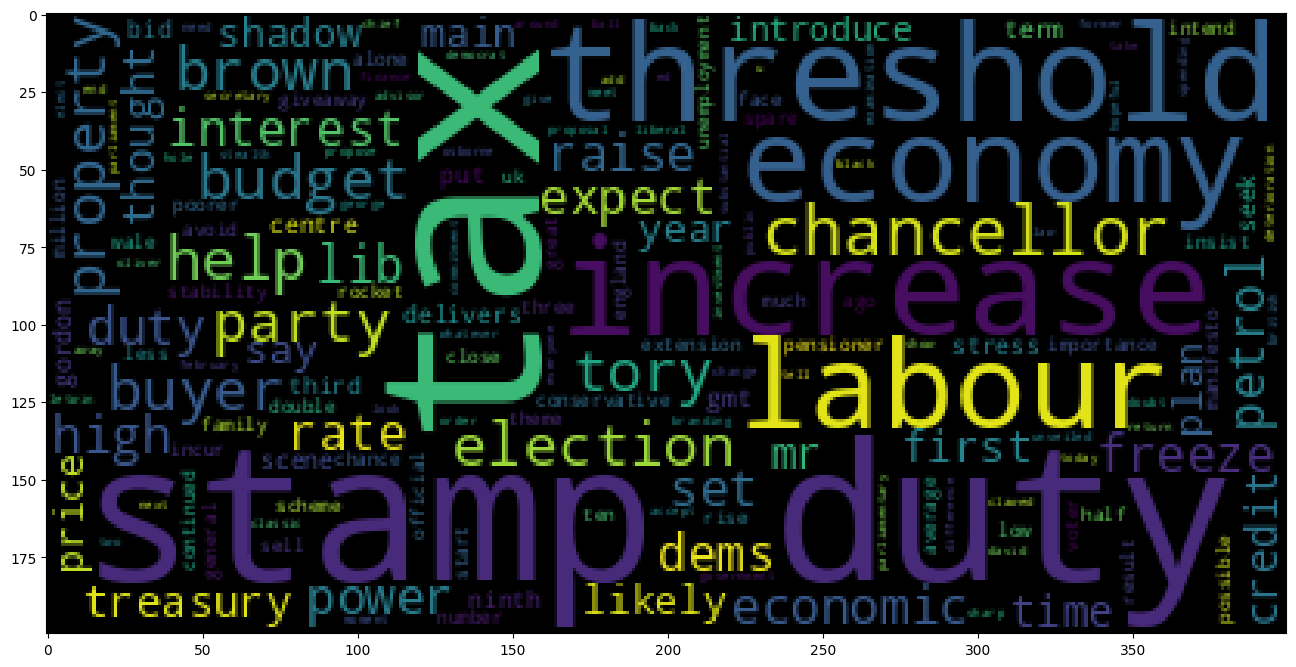

In [ ]:
# joining the cleaned arrays in a string separated with a space ' '
wcloud = WordCloud().generate(' '.join(cleaned))

plt.figure(figsize=(16,9))
plt.imshow(wcloud);

### TF*IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [ ]:
x_new = tfidf.fit_transform(df['headline'])

In [ ]:
x_new.shape

(2225, 21886)

### K-Means Cluster Object

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(random_state=0)

In [ ]:
labels = km.fit_predict(x_new)

In [ ]:
labels

array([6, 5, 6, ..., 2, 5, 2], dtype=int32)

In [ ]:
km.inertia_

2070.848960331368

### Elbow Method

In [ ]:
sse = []
for k in range(1,16):
  km = KMeans(n_clusters=k,random_state=0, n_init='auto')
  km.fit_predict(x_new)
  sse.append(km.inertia_)

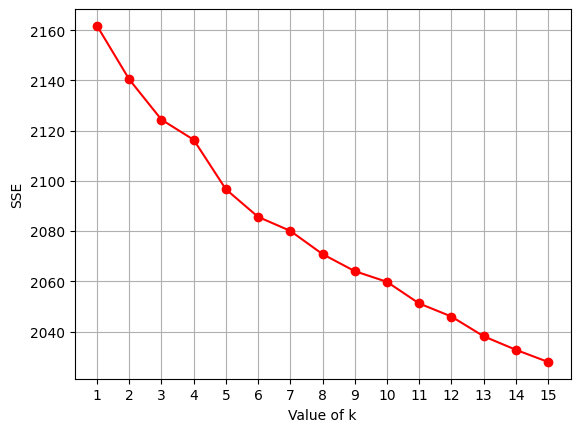

In [ ]:
plt.xlabel('Value of k')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,marker='o',color='r')

### Create the clusters

In [ ]:
km = KMeans(random_state=0, n_clusters=5,n_init='auto')

In [ ]:
labels = km.fit_predict(x_new)

In [ ]:
labels

array([4, 3, 4, ..., 3, 3, 3], dtype=int32)

### Separate the clusters

In [ ]:
zero = df[labels == 0]
one = df[labels==1]
two = df[labels==2]
three = df[labels==3]
four = df[labels==4]

In [ ]:
print('Cluster-0: ',len(zero))
print('Cluster-1: ',len(one))
print('Cluster-2: ',len(two))
print('Cluster-3: ',len(three))
print('Cluster-4: ',len(four))

Cluster-0:  380
Cluster-1:  353
Cluster-2:  520
Cluster-3:  690
Cluster-4:  282


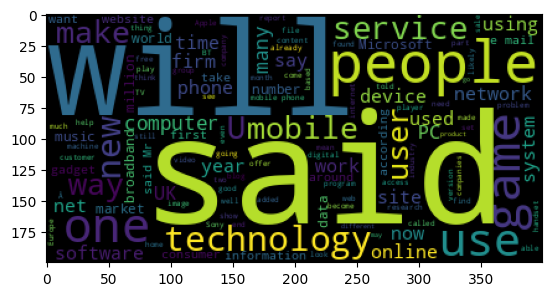

In [ ]:
wc_zero = WordCloud().generate(' '.join(zero['headline']))
plt.imshow(wc_zero);

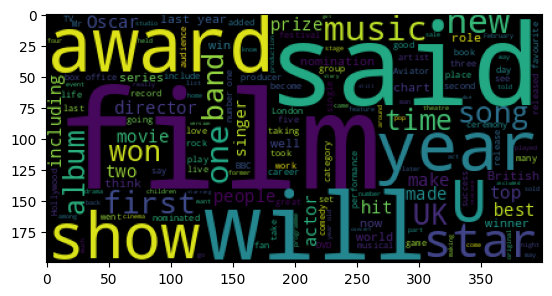

In [ ]:
wc_one = WordCloud().generate(' '.join(one['headline']))
plt.imshow(wc_one);

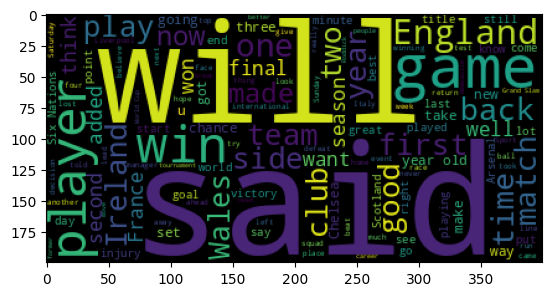

In [ ]:
wc_two = WordCloud().generate(' '.join(two['headline']))
plt.imshow(wc_two);

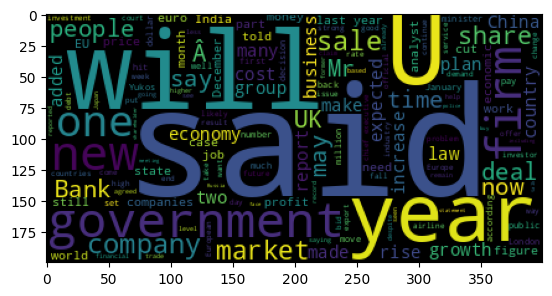

In [ ]:
wc_three = WordCloud().generate(' '.join(three['headline']))
plt.imshow(wc_three);

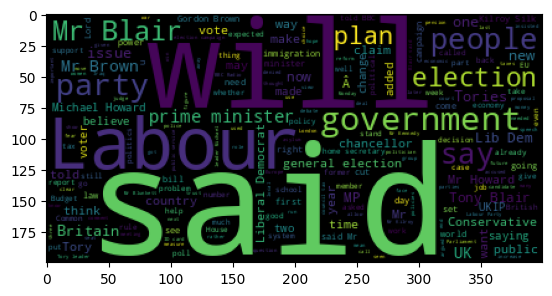

In [ ]:
wc_four = WordCloud().generate(' '.join(four['headline']))
plt.imshow(wc_four);

In [ ]:
from nltk import FreqDist
new = ' '.join(one['headline'])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)
# Label = entertainment

[('film', 671),
 ('best', 567),
 ('also', 347),
 ('year', 333),
 ('music', 314),
 ('show', 296),
 ('US', 279),
 ('one', 257),
 ('first', 232),
 ('UK', 221)]

In [ ]:
from nltk import FreqDist
new = ' '.join(zero['headline'])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)
# Label = Technology

[('people', 897),
 ('also', 496),
 ('Mr', 481),
 ('technology', 471),
 ('would', 448),
 ('new', 445),
 ('could', 438),
 ('mobile', 423),
 ('music', 405),
 ('one', 380)]

In [ ]:
from nltk import FreqDist
new = ' '.join(two['headline'])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)
# label = sports

[('game', 519),
 ('England', 466),
 ('first', 442),
 ('would', 424),
 ('win', 412),
 ('last', 369),
 ('one', 347),
 ('two', 345),
 ('also', 343),
 ('time', 340)]

In [ ]:
from nltk import FreqDist
new = ' '.join(three['headline'])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)
# label = finance

[('US', 908),
 ('Mr', 834),
 ('would', 757),
 ('year', 749),
 ('also', 586),
 ('government', 531),
 ('new', 450),
 ('could', 448),
 ('company', 446),
 ('market', 427)]

In [ ]:
from nltk import FreqDist
new = ' '.join(four['headline'])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)
# label = Politics

[('Mr', 1488),
 ('would', 814),
 ('Labour', 727),
 ('election', 547),
 ('Blair', 541),
 ('government', 501),
 ('people', 431),
 ('party', 412),
 ('Brown', 375),
 ('also', 330)]